<a href="https://colab.research.google.com/github/dekennedy/NYC-Motor-Vehicle-Collisions/blob/main/Motor_Vehicle_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import datetime as dt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Motor_Vehicle_Collisions_-_Crashes.csv to Motor_Vehicle_Collisions_-_Crashes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Motor_Vehicle_Collisions_-_Crashes.csv']))

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/20/2018,20:05,BROOKLYN,11205,40.693450,-73.95781,"(40.69345, -73.95781)",NaN,NaN,177 FRANKLIN AVENUE,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3925945,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,07/08/2018,13:15,MANHATTAN,10013,40.715157,-74.00212,"(40.715157, -74.00212)",WORTH STREET,CENTRE STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Driver Inattention/Distraction,NaN,NaN,NaN,3938087,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,06/28/2018,15:20,NaN,NaN,40.747105,-73.96709,"(40.747105, -73.96709)",QUEENS MIDTOWN TUNNEL,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3933923,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,07/11/2018,9:50,STATEN ISLAND,10306,40.556820,-74.13603,"(40.55682, -74.13603)",JUSTIN AVENUE,SOUTH RAILROAD AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,3939256,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,06/20/2018,15:00,BROOKLYN,11238,40.682420,-73.96360,"(40.68242, -73.9636)",NaN,NaN,262 SAINT JAMES PLACE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,3925683,Sedan,Sedan,NaN,NaN,NaN


In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df2020 =  df[df['CRASH DATE'].dt.year ==2020]
# df2020 = df2020.dropna(subset=['LATITUDE'])
# df2020 =  df2020[df2020['BOROUGH'] == 'MANHATTAN']
# df2020 =  df2020[df2020['NUMBER OF PERSONS KILLED'] != 0]


df2020.head()



,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
51,2020-10-25,11:34,NaN,NaN,NaN,NaN,NaN,BRUCKNER EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4361476,Sedan,NaN,NaN,NaN,NaN
155,2020-04-29,14:50,NaN,NaN,NaN,NaN,NaN,STANWIX STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4311534,Sedan,NaN,NaN,NaN,NaN
233,2020-10-25,8:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101 EAST DRIVE,0.0,0.0,0,0,0,0,0,0,View Obstructed/Limited,NaN,NaN,NaN,NaN,4361193,Sedan,NaN,NaN,NaN,NaN
260,2020-10-24,0:54,NaN,NaN,NaN,NaN,NaN,LAUREL HILL BOULEVARD,61 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4360853,Box Truck,Sedan,NaN,NaN,NaN
312,2020-10-24,15:02,NaN,NaN,NaN,NaN,NaN,3 AVENUE,EAST 161 STREET,NaN,1.0,0.0,0,0,1,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4360774,Sedan,Bike,NaN,NaN,NaN


In [ ]:
##Needs test Data


df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])
df['Hour'] = df['CRASH TIME'].dt.hour

df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Hour
0,2018-06-20,2020-11-02 20:05:00,BROOKLYN,11205,40.693450,-73.95781,"(40.69345, -73.95781)",NaN,NaN,177 FRANKLIN AVENUE,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3925945,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,20
1,2018-07-08,2020-11-02 13:15:00,MANHATTAN,10013,40.715157,-74.00212,"(40.715157, -74.00212)",WORTH STREET,CENTRE STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Driver Inattention/Distraction,NaN,NaN,NaN,3938087,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,13
2,2018-06-28,2020-11-02 15:20:00,NaN,NaN,40.747105,-73.96709,"(40.747105, -73.96709)",QUEENS MIDTOWN TUNNEL,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3933923,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,15
3,2018-07-11,2020-11-02 09:50:00,STATEN ISLAND,10306,40.556820,-74.13603,"(40.55682, -74.13603)",JUSTIN AVENUE,SOUTH RAILROAD AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,3939256,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,9
4,2018-06-20,2020-11-02 15:00:00,BROOKLYN,11238,40.682420,-73.96360,"(40.68242, -73.9636)",NaN,NaN,262 SAINT JAMES PLACE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,3925683,Sedan,Sedan,NaN,NaN,NaN,15


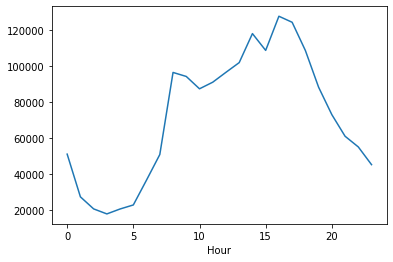

In [ ]:
HourChart = df.groupby(['Hour']).size()
HourChart.plot()





In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error , median_absolute_error
warnings.filterwarnings("ignore")
%matplotlib inline



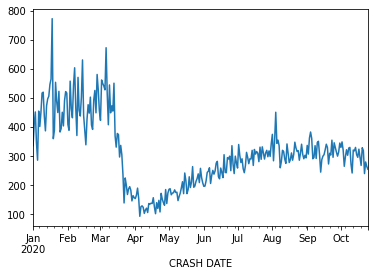

In [ ]:
CrashChart = df2020.groupby(['CRASH DATE']).size()
CrashChart.plot()


In [ ]:
import folium
from folium.plugins import HeatMap



In [ ]:
df_locations = df2020.groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().sample(200)



df_locations.head()



,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
40099,40.862873,-73.849170,0.0,0.0,0,0,0,0,0,0,4302099
32040,40.774510,-73.838036,0.0,0.0,0,0,0,0,0,0,12882102
15087,40.679955,-73.907180,0.0,0.0,0,0,0,0,0,0,4284342
22738,40.717180,-73.983110,2.0,0.0,1,0,1,0,0,0,17273777
33753,40.803566,-73.967150,1.0,0.0,1,0,0,0,0,0,4303532


In [ ]:
m = folium.Map([df_locations.LATITUDE.mean(), df_locations.LONGITUDE.mean()], zoom_start=11)
for index, row in df_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                                               ).add_to(m)
    
points = df_locations[['LATITUDE', 'LONGITUDE']].to_numpy()
m.add_children(HeatMap(points, radius=15)) # plot heatmap

m